## Tipping Probelm - advanced 

implementation of fuzzy logic using schikit-fuzzy python package. 

In [42]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

### Variables

In [43]:
# two input variables: quality and servive
# one output variable: tip 
# define a range/universe of values for each variable

uni_q = np.arange(0, 15, 1)
uni_s = np.arange(0, 15, 1)
uni_t = np.arange(0, 30, 1)

### Memberships function

In [44]:
# defining fuzzy membership functions for quality 
qual_low = fuzz.trimf(uni_q, [0, 0, 5])
qual_mid = fuzz.trimf(uni_q, [0, 5, 15])
qual_high = fuzz.trimf(uni_q, [5, 15, 15])

# defining fuzzy membership functions for service 
serv_low = fuzz.trimf(uni_s, [0, 0, 5])
serv_mid = fuzz.trimf(uni_s, [0, 5, 15])
serv_high = fuzz.trimf(uni_s, [5, 15, 15])

# defining fuzzy membership functions for tip 
tip_low = fuzz.trimf(uni_t, [0, 0, 13])
tip_mid = fuzz.trimf(uni_t, [0, 13, 25])
tip_high = fuzz.trimf(uni_t, [13, 30, 30])

#### Visulaize

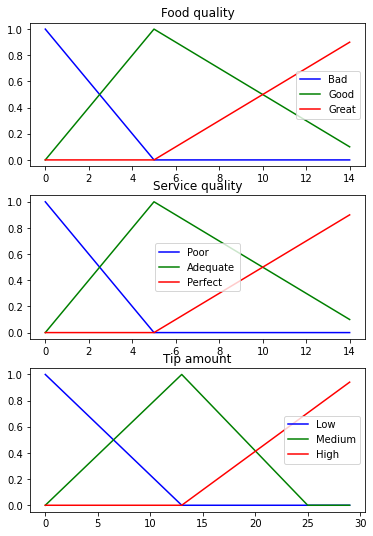

In [45]:
# visulaize the membership functions in the universe
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize = (6, 9))

ax0.plot(uni_q, qual_low, 'b', linewidth=1.5, label='Bad')
ax0.plot(uni_q, qual_mid, 'g', linewidth=1.5, label='Good')
ax0.plot(uni_q, qual_high, 'r', linewidth=1.5, label='Great')
ax0.set_title('Food quality')
ax0.legend()

ax1.plot(uni_s, serv_low, 'b', linewidth=1.5, label='Poor')
ax1.plot(uni_s, serv_mid, 'g', linewidth=1.5, label='Adequate')
ax1.plot(uni_s, serv_high, 'r', linewidth=1.5, label='Perfect')
ax1.set_title('Service quality')
ax1.legend()

ax2.plot(uni_t, tip_low, 'b', linewidth=1.5, label='Low')
ax2.plot(uni_t, tip_mid, 'g', linewidth=1.5, label='Medium')
ax2.plot(uni_t, tip_high, 'r', linewidth=1.5, label='High')
ax2.set_title('Tip amount')
ax2.legend()


### Fuzzy Rules

In [46]:
#rules
qual_level_low = fuzz.interp_membership(uni_q, qual_low, 6.5)
qual_level_mid = fuzz.interp_membership(uni_q, qual_mid, 6.5)
qual_level_high = fuzz.interp_membership(uni_q, qual_high, 6.5)
serv_level_low = fuzz.interp_membership(uni_s, serv_low, 9.8)
serv_level_mid = fuzz.interp_membership(uni_s, serv_mid, 9.8)
serv_level_high = fuzz.interp_membership(uni_s, serv_high, 9.8)

#rule activation: for food quality low and service quality low the tip will also be low. 
rule1 = np.fmax(qual_level_low, serv_level_low)
tip_activation_low = np.fmin(rule1, tip_low)

#rule2 activation: for food quality good and service quality Adequate the tip will also be medium. 
rule2 = np.fmax(qual_level_mid, serv_level_mid)
tip_activation_mid = np.fmin(rule2, tip_mid)

#rule2 activation: for food quality Great and service quality perfect the tip will also be High. 
rule3 = np.fmax(qual_level_high, serv_level_high)
tip_activation_high = np.fmin(rule2, tip_high)
tip0 = np.zeros_like(uni_t)                         

#### Visulaization

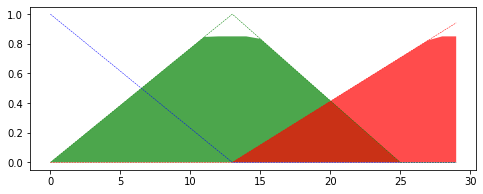

In [54]:
# Visualize the tip 
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(uni_t, tip0, tip_activation_low, facecolor='b', alpha=0.7)
ax0.plot(uni_t, tip_low, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(uni_t, tip0, tip_activation_mid, facecolor='g', alpha=0.7)
ax0.plot(uni_t, tip_mid, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(uni_t, tip0, tip_activation_high, facecolor='r', alpha=0.7)
ax0.plot(uni_t, tip_high, 'r', linewidth=0.5, linestyle='--')
#ax0.set_title('Output membership activity')



### Rule agregation

With the activity of each output membership function known, all output membership functions must be combined. This is typically done using a maximum operator. This step is also known as aggregation.

In [52]:
aggregated = np.fmax(tip_activation_low, 
                     np.fmax(tip_activation_mid, tip_activation_high))

### Defuzzification

In [50]:
# caculate defuzzified result 
tip =fuzz.defuzz(uni_t, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(uni_t, aggregated, tip)
print(tip_activation)

0.7127761720095951


#### Visualize

In [53]:
# Visualize tip
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.plot(uni_t, tip_low, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(uni_t, tip_mid, 'g', linewidth=0.5, linestyle='--')
ax0.plot(uni_t, tip_high, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(uni_t, tip0, aggregated, facecolor='blue', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership')

Text(0.5, 1.0, 'Aggregated membership')